In [9]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

In [10]:
def retrieve_data():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        score = pd.read_sql_table('classification', con)
        genetics = pd.read_sql_table('genetics', con)
    return score, genetics

def merge_data(score, genetics):
    return pd.merge(left=score, right=genetics, left_on='animal_id', right_on='animal_id')

def select_features(data):
    score_elements = ['breed_age_average', 'final_score']
    genetics_features = ['milk', 'ctpi', 'animal_id']
    
    features = genetics_features + score_elements
    
    return data[features].dropna(axis=0, how='any')

def get_data():
    score, genetics = retrieve_data()
    data = merge_data(score, genetics)
    return select_features(data)    

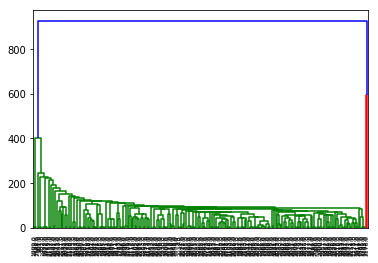

In [12]:
data = get_data()

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(data.drop(['animal_id'], axis=1, inplace = False), method='single')

# Plot the dendrogram
dendrogram(mergings, labels=data['animal_id'].values, leaf_rotation=90, leaf_font_size=6)
plt.show()